# <font color='cornflowerblue'>IAF 604 (Machine Learning & Predictive Analytics)
# <font color='cornflowerblue'>Project 2 (Abimbola Ogungbire)

## Building a Random Forest Classifier for Network Traffic Classification



In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from numpy.polynomial.polynomial import polyfit
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn import preprocessing

/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
KDD_V1 = pd.read_csv('nslkdd-version1.csv')
KDD_V2 = pd.read_csv('nslkdd-version2.csv')

In [4]:
# Checking the dimension of version1
KDD_V1.shape

(25192, 42)

In [5]:
# Checking the dimension of version2
KDD_V2.shape

(25192, 36)

In [6]:
# Checking the first five cases of version1
KDD_V1.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
# Checking the first five cases of version2
KDD_V2.head()

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [8]:
KDD_V2.a42.value_counts()

0     13449
1      8282
4       710
8       691
5       587
9       529
7       301
2       196
6       188
3       181
10       38
11       10
14        7
18        6
17        5
21        4
13        2
20        2
16        1
12        1
19        1
15        1
Name: a42, dtype: int64

In [9]:
# Checking the number of missing values in each variable
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(KDD_V1.isnull().sum())

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64


In [10]:
# Checking the statistical information of KDD_V1 dataframe
KDD_V1.describe()

,a1,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Checking the statistical information of KDD_V1 dataframe
KDD_V2.describe()

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,0.000079,0.023738,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,1.171364
std,0.008910,0.260221,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,2.222340
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


## Similarities and Dissimilarities between the Two Data sets

# Similarities

1. Both data sets have 36 columns in common. i.e from a7 to a42
2. All similar columns in both data sets have the same statistical properties
3. Both data sets have the same number of observations or cases

# Dissimilarities

1. The two data sets have different dimensions. i.e they have different number of variables
2. The two data sets are of different size.
3. The column name a42 are of different data types. i.e the version 2 dataset has been encoded numerically.

N.B- In order to perform network traffic classification on the data set, it is paramount that we make use of a complete dataset. Therefore, version 1 having a more complete observation will be found more useful in the accurate classification of network traffic.

Does the data set need further processing?
There is need for us to pre-process this data for further analysis. It is important for us to transform all string variables to numeric data types that our classifier can understand. Therefore in order to train the model, there may be need for further processing

## Data Processing and Exploration

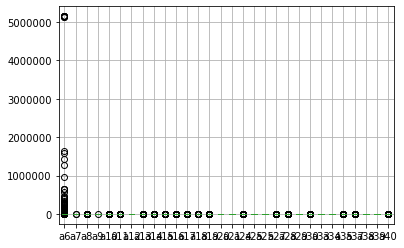

In [12]:
#Checking the distributions of few variables in the KDD_V1 dataframe
KDD_V1.boxplot(column = ['a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a24', 'a25', 'a25', 'a27', 'a28', 'a29', 'a30', 'a33', 'a34', 'a35', 'a37', 'a38', 'a39', 'a40'])

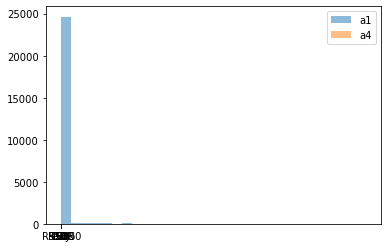

In [13]:
plt.hist(KDD_V1['a1'], alpha=0.5, label='a1', bins=30)
plt.hist(KDD_V1['a4'], alpha=0.5, label='a4', bins=30)
plt.legend(loc='upper right')
plt.show()

In [14]:
#Checking for imbalanced data
KDD_V1.a42.value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
ftp_write              1
loadmodule             1
land                   1
spy                    1
Name: a42, dtype: int64

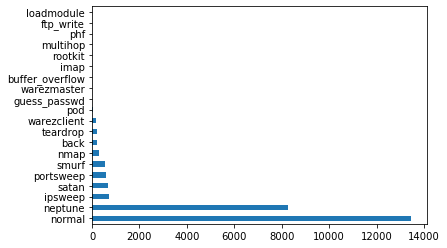

In [15]:
# Visualizing the number of values in a42
KDD_V1['a42'].value_counts()[:20].plot(kind='barh')

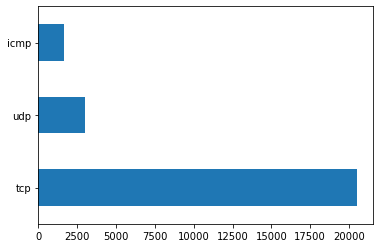

In [16]:
# Visualizing the number of values in a2
KDD_V1['a2'].value_counts()[:20].plot(kind='barh')

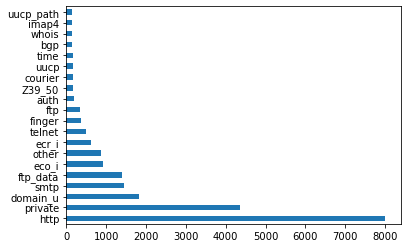

In [17]:
# Visualizing the number of values in a3
KDD_V1['a3'].value_counts()[:20].plot(kind='barh')

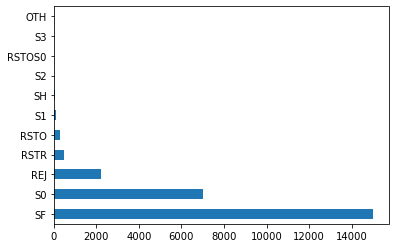

In [18]:
# Visualizing the number of values in a4
KDD_V1['a4'].value_counts()[:20].plot(kind='barh')

In [19]:
# Finding duplicate columns
def DuplicateColumn(df):
    DuplicateColumns= set()
    for i in range(df.shape[1]):
        col = df.iloc[:, i]
        for j in range(i + 1, df.shape[1]):
            others = df.iloc[:, j]
            if col.equals(others):
                DuplicateColumns.add(df.columns.values[j])
 
    return list(DuplicateColumns)
DuplicateColumn(KDD_V1)

['a21']

The column a21 matches with a20. Therefore, it is reasonable to drop one of the two columns.

In [20]:
# Dropping duplicate column
del KDD_V1['a21']

In [21]:
# Checking to make sure the column a21 is out of the dataframe
KDD_V1.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [22]:
# Converting string data tupes to numeric 
le = preprocessing.LabelEncoder()
KDD_V1["a2"] = le.fit_transform(KDD_V1["a2"])
KDD_V1["a3"] = le.fit_transform(KDD_V1["a3"])
KDD_V1["a4"] = le.fit_transform(KDD_V1["a4"])
KDD_V1["a42"] = le.fit_transform(KDD_V1["a42"])

In [23]:
# Checking the variable to be sure it has been encoded numerically
KDD_V1.a42.value_counts()

11    13449
9      8282
5       710
16      691
14      587
17      529
10      301
0       196
19      188
20      181
13       38
3        10
21        7
1         6
4         5
15        4
8         2
12        2
7         1
6         1
18        1
2         1
Name: a42, dtype: int64

In [24]:
# Checking the variable to be sure it has been encoded numerically
KDD_V1.a2.value_counts()

1    20526
2     3011
0     1655
Name: a2, dtype: int64

In [25]:
# Checking the variable to be sure it has been encoded numerically
KDD_V1.a3.value_counts()

22    8003
46    4351
11    1820
51    1449
19    1396
      ... 
60       4
47       3
42       3
58       2
24       1
Name: a3, Length: 66, dtype: int64

In [26]:
KDD_V1.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,1,19,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,2,41,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,1,22,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,1,22,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11


In [27]:
# Creating an array for the the feature and label
Features = KDD_V1[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41']]
Label = KDD_V1['a42']

In [28]:
# Spliting KDD_V1 into the train and test data
Train_features, Test_features, Train_label, Test_label = train_test_split(Features, Label, test_size = 0.25, random_state = 42)

In [29]:
#Checking the dimensions of individual features and label
print('Training Features Shape:', Train_features.shape)
print('Training Labels Shape:', Train_label.shape)
print('Testing Features Shape:', Test_features.shape)
print('Testing Labels Shape:', Test_label.shape)

Training Features Shape: (18894, 40)
Training Labels Shape: (18894,)
Testing Features Shape: (6298, 40)
Testing Labels Shape: (6298,)


In [30]:
# Fitting a randomforest model
ran_forest1 = RandomForestClassifier(n_estimators=1000, random_state = 42)
# Train the model on training data
ran_forest1.fit(Train_features, Train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
# Checking the accuracy of the model
ran_forest1_pred = ran_forest1.predict(Test_features)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Test_label, ran_forest1_pred))

Accuracy: 0.996665608129565


In [33]:
# Checking the important variables in the fitted model
feature_imp = pd.Series(ran_forest1.feature_importances_, index = Train_features.columns).sort_values(ascending=False)
feature_imp

a5     0.127843
a29    0.096287
a4     0.076312
a30    0.076014
a23    0.046714
a6     0.046375
a38    0.044052
a34    0.041892
a39    0.039649
a25    0.039436
a26    0.037747
a36    0.037351
a35    0.036254
a37    0.032104
a2     0.032029
a33    0.027917
a24    0.025163
a3     0.022787
a32    0.019717
a40    0.017545
a41    0.012480
a12    0.012234
a27    0.012115
a8     0.010313
a10    0.007177
a28    0.006812
a31    0.005129
a13    0.004750
a1     0.003759
a22    0.001020
a16    0.000277
a17    0.000225
a11    0.000182
a14    0.000143
a19    0.000072
a9     0.000048
a7     0.000037
a18    0.000027
a15    0.000013
a20    0.000000
dtype: float64

No handles with labels found to put in legend.


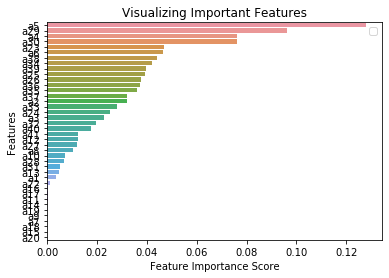

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Removing Redundant Variables

Variables that are redundant will be moved in the model until an optimum model is achieved. i.e the model with less variables and high accuracy.

In [35]:
# Creating an array for the the feature and label
Features = KDD_V1[['a2', 'a3', 'a4', 'a5', 'a6', 'a8', 'a12', 'a23', 'a24', 'a25', 'a26', 'a27', 'a29', 'a30', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41']]
Label = KDD_V1[['a42']]

# Spliting KDD_V1 into the train and test data
Train_features, Test_features, Train_label, Test_label = train_test_split(Features, Label, test_size = 0.25, random_state = 25)

In [36]:
print('Training Features Shape:', Train_features.shape)
print('Training Labels Shape:', Train_label.shape)
print('Testing Features Shape:', Test_features.shape)
print('Testing Labels Shape:', Test_label.shape)

Training Features Shape: (18894, 24)
Training Labels Shape: (18894, 1)
Testing Features Shape: (6298, 24)
Testing Labels Shape: (6298, 1)


In [37]:
# Fitting a randomforest model
ran_forest2 = RandomForestClassifier(n_estimators=1000, random_state = 25)
# Train the model on training data
ran_forest2.fit(Train_features, Train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [38]:
ran_forest2_pred = ran_forest2.predict(Test_features)
print("Accuracy:", metrics.accuracy_score(Test_label, ran_forest2_pred))

Accuracy: 0.9965068275643061


Since the accuracy of the model remain the same, we will investigate further if the accuracy of the model will be impacted by further removal of less important variables. I will attempt to drop the variable a8 and see how it impact my model.

In [39]:
# Creating an array for the the feature and label
Features = KDD_V1[['a2', 'a3', 'a4', 'a5', 'a6', 'a12', 'a23', 'a24', 'a25', 'a26', 'a27', 'a29', 'a30', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41']]
Label = KDD_V1['a42']

# Spliting KDD_V1 into the train and test data
Train_features, Test_features, Train_label, Test_label = train_test_split(Features, Label, test_size = 0.25, random_state = 19)

In [40]:
print('Training Features Shape:', Train_features.shape)
print('Training Labels Shape:', Train_label.shape)
print('Testing Features Shape:', Test_features.shape)
print('Testing Labels Shape:', Test_label.shape)

Training Features Shape: (18894, 23)
Training Labels Shape: (18894,)
Testing Features Shape: (6298, 23)
Testing Labels Shape: (6298,)


In [41]:
# Fitting a randomforest model
ran_forest3 = RandomForestClassifier(n_estimators=1000, random_state = 25)
# Train the model on training data
ran_forest3.fit(Train_features, Train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [42]:
ran_forest3_pred = ran_forest3.predict(Test_features)
print("Accuracy:", metrics.accuracy_score(Test_label, ran_forest3_pred))

Accuracy: 0.9957129247380121


Having dropped variable a8, my model accuracy dropped from 99.6 to 99.5. Perharps, It will be wise for us to keep the variables in the model 'ran_forest2' since is it an optimum model.

## Generating the Model on Selected Variables

Since the variables in the model 'ran_forest2' above produces the optimum accuracy. The variables in the model 'ran_forest2' will be kept as the final model. 

In [43]:
# Creating an array for the the feature and label
Features = KDD_V1[['a2', 'a3', 'a4', 'a5', 'a6', 'a8', 'a12', 'a23', 'a24', 'a25', 'a26', 'a27', 'a29', 'a30', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41']]
Label = KDD_V1[['a42']]

# Spliting KDD_V1 into the train and test data
Train_features, Test_features, Train_label, Test_label = train_test_split(Features, Label, test_size = 0.25, random_state = 25)

In [44]:
print('Training Features Shape:', Train_features.shape)
print('Training Labels Shape:', Train_label.shape)
print('Testing Features Shape:', Test_features.shape)
print('Testing Labels Shape:', Test_label.shape)

Training Features Shape: (18894, 24)
Training Labels Shape: (18894, 1)
Testing Features Shape: (6298, 24)
Testing Labels Shape: (6298, 1)


In [45]:
# Fitting a randomforest model
final_forest = RandomForestClassifier(n_estimators=1000, random_state = 25, oob_score = True)
# Train the model on training data
final_forest.fit(Train_features, Train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=25, verbose=0,
                       warm_start=False)

In [46]:
final_forest_pred = final_forest.predict(Test_features)
print("Accuracy:", metrics.accuracy_score(Test_label, final_forest_pred))

Accuracy: 0.9965068275643061


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Test_label, final_forest_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
[[  56    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0]
 [   0    0    4    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0  186    0    0    0    3    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0 2095    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    1    0    0   79    0    0    0    0    0    0
     0    0    0    0]
 [   1    0    0    0    0    1    0    0 3336    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0 

In [48]:
# Obtaining the acuracy of the model using out of bag estimate.
final_forest.oob_score_

0.996665608129565

## Conclusion

Having arrived at a final model name 'final_forest,' the following assertion could me made.

1. From the above confusion matrix above, we were able to maximize the true positive values and minimize both the false positive and false negative. The result shows a model with a very good predicting power.
2. The accuracy of the random forest model is given as 99.6% which is the same when calculated with the out of bag samples. Hence, we have truely gotten an optimum model for the data set.
3. The final model contains variables with high importance.
4. The 18 x 18 confusion matrix shows an infinitessimal amount of misclassification.